## Problem 1

In [1]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

In [26]:
x=sy.symbols('x')
fun=(sy.sin(x)+1)**(sy.sin(sy.cos(x)))
a=np.arange(-np.pi,np.pi,0.01)

In [30]:
def function(fun,a):
    f=sy.lambdify(x, fun, 'numpy')
    fa=f(a)
    
    differ=sy.diff(fun,x)
    df=sy.lambdify(x, differ, 'numpy')
    dfa=df(a)
    return dfa

In [31]:
y=function(fun,a)
f=sy.lambdify(x, fun, 'numpy')
fa=f(a)

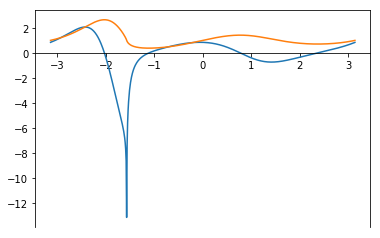

In [32]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(a,y)
ax.plot(a,fa);

## Problem 2

In [22]:
h=0.01
x=sy.symbols('x')
fun=(sy.sin(x)+1)**(sy.sin(sy.cos(x)))
a=np.arange(-np.pi,np.pi,0.01)

In [ ]:
def forw_1(fun,a,h):
    differ= (f(a+h)-f(a))/h

In [23]:
def forw_1(fun,a,h):
    f=sy.lambdify(x, fun, 'numpy')
    fa=f(a)
    
    differ= (f(a+h)-f(a))/h
    df=sy.lambdify(x, differ, 'numpy')
    dfa=df(a)
    return dfa

def forw_2(fun,a,h):
    f=sy.lambdify(x, fun, 'numpy')
    fa=f(a)
    
    differ= (-3*f(a)+4*f(a+h)-f(a+2*h))/(2*h)
    df=sy.lambdify(x, differ, 'numpy')
    dfa=df(a)
    return dfa

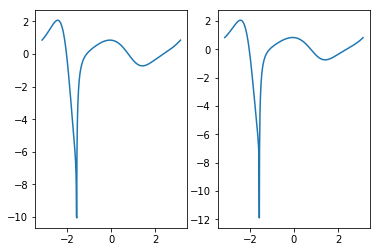

In [24]:
y1=forw_1(fun,a,h)
y2=forw_2(fun,a,h)
ax1=plt.subplot(121)
ax1.plot(a, y1)
ax2=plt.subplot(122)
ax2.plot(a, y2);

In [25]:
def backw_1(fun,a,h):
    f=sy.lambdify(x, fun, 'numpy')
    fa=f(a)
    
    differ= (f(a)-f(a-h))/h
    df=sy.lambdify(x, differ, 'numpy')
    dfa=df(a)
    return dfa

def backw_2(fun,a,h):
    f=sy.lambdify(x, fun, 'numpy')
    fa=f(a)
    
    differ= (3*f(a)-4*f(a-h)+f(a-2*h))/(2*h)
    df=sy.lambdify(x, differ, 'numpy')
    dfa=df(a)
    return dfa

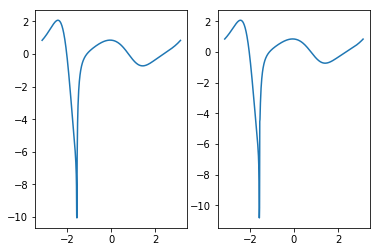

In [26]:
y1=backw_1(fun,a,h)
y2=backw_2(fun,a,h)
ax1=plt.subplot(121)
ax1.plot(a, y1)
ax2=plt.subplot(122)
ax2.plot(a, y2);

In [27]:
def center_1(fun,a,h):
    f=sy.lambdify(x, fun, 'numpy')
    fa=f(a)
    
    differ= (f(a+h)-f(a-h))/(2*h)
    df=sy.lambdify(x, differ, 'numpy')
    dfa=df(a)
    return dfa

def center_2(fun,a,h):
    f=sy.lambdify(x, fun, 'numpy')
    fa=f(a)
    
    differ= (f(a-2*h)-8*f(a-h)+8*f(a+h)-f(a+2*h))/(12*h)
    df=sy.lambdify(x, differ, 'numpy')
    dfa=df(a)
    return dfa

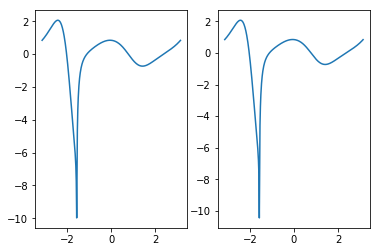

In [28]:
y1=center_1(fun,a,h)
y2=center_2(fun,a,h)
ax1=plt.subplot(121)
ax1.plot(a, y1)
ax2=plt.subplot(122)
ax2.plot(a, y2);

In [ ]:
## All plots look very similar to Problem 1 and to eachother --> good!

## Problem 3

In [29]:
h=np.logspace(-8, 0, 4)
x=sy.symbols('x')
fun=(sy.sin(x)+1)**(sy.sin(sy.cos(x)))
a=1

In [30]:
y=function(fun,a)

In [32]:
y1=forw_1(fun,a,h)
y2=forw_2(fun,a,h)
y3=backw_1(fun,a,h)
y4=backw_2(fun,a,h)
y5=center_1(fun,a,h)
y6=center_2(fun,a,h)

In [33]:
e1=abs(y1-y)
e2=abs(y2-y)
e3=abs(y3-y)
e4=abs(y-y4)
e5=abs(y-y5)
e6=abs(y-y6)

''

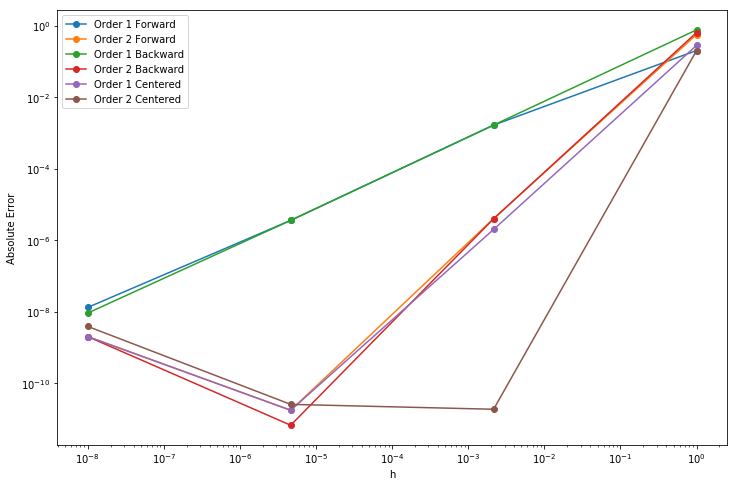

In [47]:
fig=plt.figure(figsize=(12,8))
plt.loglog(h,e1,'-o', label="Order 1 Forward")
plt.loglog(h,e2,'-o', label="Order 2 Forward")
plt.loglog(h,e3,'-o', label="Order 1 Backward")
plt.loglog(h,e4,'-o', label="Order 2 Backward")
plt.loglog(h,e5,'-o', label="Order 1 Centered")
plt.loglog(h,e6,'-o', label="Order 2 Centered")
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.legend();


## Problem 5

In [6]:
def jacob(f, x0,h):
    e=np.eye(len(x0))
    jac=np.empty([2,len(x0)])
    x0=np.array(x0)
    for i in range(0,len(x0),1):
        a=f(x0+h*e[:,i])
        b=f(x0-h*e[:,i])
        jac[:,i]=(a-b)/(2*h)

    return jac

In [7]:
def f(x):
    f=np.array([x[0]**2,x[0]**3-x[1]])
    return f

In [8]:
h=0.1
x0=np.array([2,3])

In [9]:
jacob(f,x0,h)

array([[ 4.  ,  0.  ],
       [12.01, -1.  ]])

## Problem 6

In [10]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad
from matplotlib import pyplot as plt

In [11]:
def chebyshev(x,n):
    if n==0:
        return anp.ones_like(x)
    elif n==1:
        return x
    else:
        return 2*x*chebyshev(x,n - 1)-chebyshev(x,n-2)

In [12]:
grad_chebyshev= elementwise_grad(chebyshev)

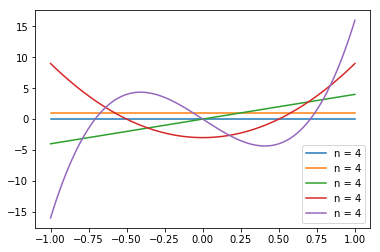

In [14]:
x_grid = anp.linspace(-1, 1,100)
for n in range(5):
    plt.plot(x_grid, grad_chebyshev(x_grid, n), label=f'n = {nn}')
plt.legend()
plt.show()